In [1]:
#Import modules
import numpy as np
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import Dataset
import pandas as pd
from surprise import Reader
from surprise.model_selection.split import PredefinedKFold
from surprise import accuracy
from surprise.prediction_algorithms.knns import KNNBasic
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load Data
folds_files = [('train.txt','test.txt')]
reader = Reader(line_format='user item rating', sep='\t', skip_lines=None, rating_scale=(1, 5))
data = Dataset.load_from_folds(folds_files,reader=reader)
pkf = PredefinedKFold()
trainset, testset = next(pkf.split(data))

In [7]:
#Set params
k=20
epochs = 30
lambdas = 0.1
eta = 0.03
algo = SVD(n_factors=k,n_epochs=epochs,reg_all=0.1,lr_all=eta)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions,verbose=True)

#Set params
k=20
epochs = 30
lambdas = 0.1
algo = SVD(n_factors=k,n_epochs=epochs,biased=False,reg_all=0.1,lr_all=eta)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions,verbose=True)

algo.fit()


RMSE: 0.9143
RMSE: 0.9458


0.9458012314497669

In [2]:
#Load Data
reader = Reader(line_format='user item rating', sep='\t', skip_lines=None, rating_scale=(1, 5))
data = Dataset.load_from_file('data.txt',reader=reader)
trainset = data.build_full_trainset()
#Set params
k=20
epochs = 30
lambdas = 0.1
eta = 0.03
#fit movie lens data set
algo = SVD(n_factors=k,n_epochs=epochs,biased=False,reg_all=0.1,lr_all=eta)
algo.fit(trainset)
#Get V and U
V_surprise = algo.qi
U_surprise = algo.pu

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 21 16:05:07 2019

Code to answer Part 4: Basic Visualizations

@author: evascheller
"""
import numpy as np
import matplotlib.pyplot as plt

#Problem 1
data = np.loadtxt('data.txt',delimiter='\t')
MovieNames = np.genfromtxt('movies.txt',delimiter='\t',dtype=None,encoding='ISO-8859-1',usecols=(1,))

User_ID = data[:,0]
Movie_ID = data[:,1]
Rating = data[:,2]

labels, counts = np.unique(Rating, return_counts=True)

#Problem 2
Movie_ID_number, counts_Movie_ID = np.unique(Movie_ID, return_counts=True)
counts_Movie_ID, Movie_ID_number = zip(*sorted(zip(counts_Movie_ID,Movie_ID_number)))
Most_popular_movie_ID = Movie_ID_number[len(Movie_ID_number)-11:len(Movie_ID_number)-1]
Most_popular_movie_counts = counts_Movie_ID[len(counts_Movie_ID)-11:len(counts_Movie_ID)-1]
Most_popular_movie_name = []
for ID in Most_popular_movie_ID:
    Most_popular_movie_name.append(MovieNames[int(ID)-1])

#Problem 3
Average_rating = []
for ID in Movie_ID_number:
    summing = 0
    division = 0
    for i in range(len(Movie_ID)):
        if Movie_ID[i] == ID:
            summing += Rating[i]
            division += 1
    Average_rating.append(summing/division)
        
Average_rating, Movie_ID_number = zip(*sorted(zip(Average_rating,Movie_ID_number)))

Best_movie_ID = Movie_ID_number[len(Movie_ID_number)-11:len(Movie_ID_number)-1]
Best_movie_rating = Average_rating[len(Average_rating)-11:len(Average_rating)-1]
Best_movie_name = []
for ID in Best_movie_ID:
    Best_movie_name.append(MovieNames[int(ID)-1])

Average_rating_of_popular_movies = []

for ID in Most_popular_movie_ID:
    for index in range(len(Movie_ID_number)):
        if Movie_ID_number[index] == ID:
           Average_rating_of_popular_movies.append(Average_rating[index])
        

In [6]:
#Plot random 10 movies

Movie_ID = np.array([127,187,64,172,181,50,59,60,61,89])
Movie_name = ['Godfather Part I','Godfather: Part II','Shawshank Redemption','Empire Strikes Back','Return of the Jedi','Star Wars','Three Colors: Red','Three Colors:Blue','Three Colors: White','Blade Runner']



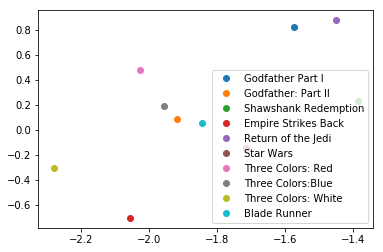

In [9]:
def project_movies_2D(V, movie_IDs):
    V_T = np.transpose(V)
    A_v, sigma_v, B_v = np.linalg.svd(V_T)

    # 2D projection of U and V
    # U_proj = np.matmul(A_u[:,0:2], U)
    V_proj = np.matmul(np.transpose(A_v[:, 0:2]), V_T)

    # take only the columns corresponding to movie ids. 
    # movie ids are 1 indexed, so subtract by 1. 
    movie_IDs -= 1
    V_proj_specific = V_proj[:, movie_IDs]

    return (V_proj_specific[0], V_proj_specific[1])


#Ten random movies 
V1,V2 = project_movies_2D(V_surprise, Movie_ID)

plt.figure(1)
for i in range(len(V1)):
    plt.plot(V1[i],V2[i],'o',label=Movie_name[i])
plt.legend(loc='')

plt.show()